In [30]:
import sys
sys.path.insert(0,"..")

import trait2d.simulators as t2dsim

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pyDialogue import *

In [32]:
## Let's create several tracks

num_of_tracks = 3

MultiSim = t2dsim.BrownianDiffusion(Tmax=1.4, dt=1e-3, L=1, dL=20e-9, d=2e-13, seed = 11, quantize = False)

col = {'T':[], 'Position X':[], 'Position Y':[], 'TrackID':[]}

for i in range(num_of_tracks):
    MultiSim.run()
    col['Position X'].append(MultiSim.trajectory['x'])
    col['Position Y'].append(MultiSim.trajectory['y'])
    col['T'].append(MultiSim.trajectory['t'])
    col['TrackID'].append(np.full(shape = len(MultiSim.trajectory['t']), fill_value=i))
    
col['T'] = np.concatenate(col['T'])
col['Position X'] = np.concatenate(col['Position X'])
col['Position Y'] = np.concatenate(col['Position Y'])
col['TrackID'] = np.concatenate(col['TrackID'])

DF = pd.DataFrame(col)
DF.to_csv(askDIR()+"/"+input()+".csv", index=False)

Brownian Diffusion Simulation: 1400it [00:00, 174804.29it/s]           


Free diffusion simulation was completed in 1400 iterations.


Brownian Diffusion Simulation: 1400it [00:00, 174955.33it/s]           


Free diffusion simulation was completed in 1400 iterations.


Brownian Diffusion Simulation: 1400it [00:00, 174976.18it/s]           


Free diffusion simulation was completed in 1400 iterations.


## Let's make some noise!

In [10]:
import sys
sys.path.insert(0,'..')

import trait2d.analysis as tr
import trait2d.analysis.minflux as mf
from trait2d.analysis.minflux import MFTrack, MFTrackDB, track_extractor
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from os import listdir,makedirs
import os
import json
import shutil
import pandas as pd
from trait2d.analysis import BIC #function that calculates the BIC, obviously
from scipy.optimize import curve_fit
from scipy.stats import kstest
plt.style.use('dark_background')

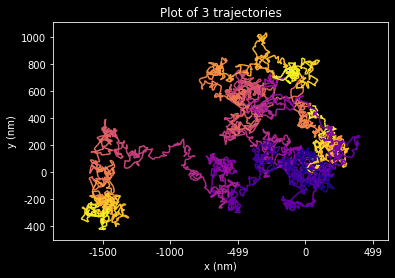

In [33]:
Test = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
Test.plot_trajectories()

In [12]:
## Let's create noise

import copy

### Constant offset, random angle

def constantOffset_randomAngle(TrackDB:MFTrackDB, offset, scale:float = 1e-9, seed:int = None, plot:bool = True, save:bool = False):
    if seed != None:
        np.random.seed(seed=seed)
        
    TrackDB_copy = copy.deepcopy(TrackDB)
    
    for track in TrackDB_copy._tracks:
        scale_in = offset * scale
        phi = np.random.randint(0,360,size=track._x.shape[0]) * (np.pi / 180)
        
        track._y = (track._y + scale_in) * np.sin(phi)
        track._x = (track._x + scale_in) * np.cos(phi)
        
    if save:
        TrackDB_copy.saveTracks(format='constantOffset_randomAngle_Noise.csv')
    if plot:
        TrackDB_copy.plot_trajectories()
        
    return TrackDB_copy

def constantOffset_randomAngle_cumsum(TrackDB:MFTrackDB, offset, scale:float = 1e-9, seed:int = None, plot:bool = True, save:bool = False):
    if seed != None:
        np.random.seed(seed=seed)
        
    TrackDB_copy = copy.deepcopy(TrackDB)
    
    for track in TrackDB_copy._tracks:
        scale_in = offset * scale
        phi = np.random.randint(0,360,size=track._x.shape[0]) * (np.pi / 180)
        
        track._y = np.cumsum((track._y + scale_in) * np.sin(phi))
        track._x = np.cumsum((track._x + scale_in) * np.cos(phi))
        
    if save:
        TrackDB_copy.saveTracks(format='constantOffset_randomAngle_CumsumNoise.csv')
    if plot:
        TrackDB_copy.plot_trajectories()
        
    return TrackDB_copy

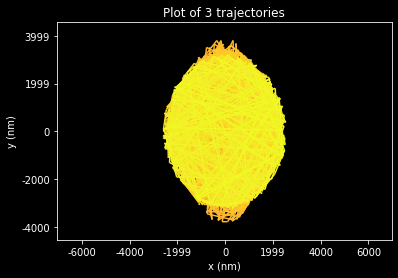

In [13]:
noise_test = constantOffset_randomAngle(TrackDB=Test, offset= 15, seed = 11,save=True)

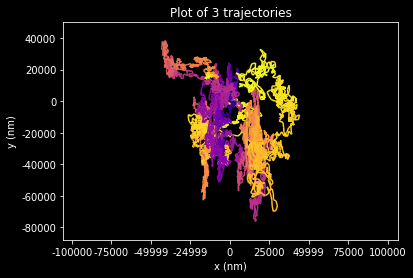

In [5]:
noise_test = constantOffset_randomAngle_cumsum(TrackDB=Test, offset= 4, seed = 11,save=True)

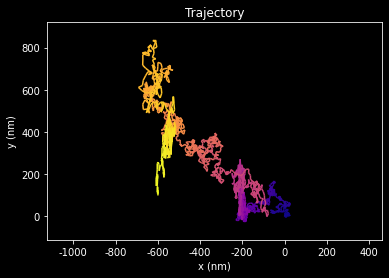

In [7]:
noise_test._tracks[0].plot_trajectory()

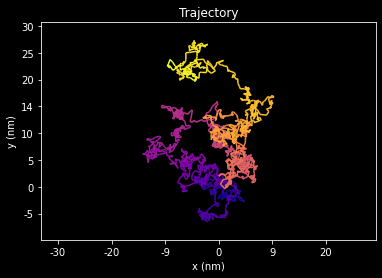

In [8]:
Test._tracks[0].plot_trajectory()

In [32]:
Test._tracks[0].MF_calculate_MSD()

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/2001 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/2000 [00:00<?, ?it/s]

In [47]:
noise_test._tracks[0].MF_calculate_MSD()

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/2001 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/2000 [00:00<?, ?it/s]

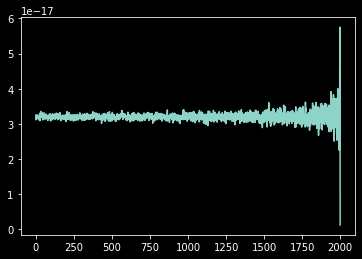

In [48]:
plt.plot(noise_test._tracks[0]._msd)

In [49]:
np.sqrt(3e-17)

5.477225575051661e-09

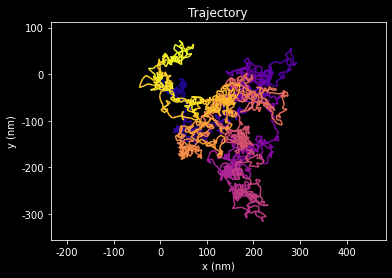

In [39]:
noise_test._tracks[1].plot_trajectory()

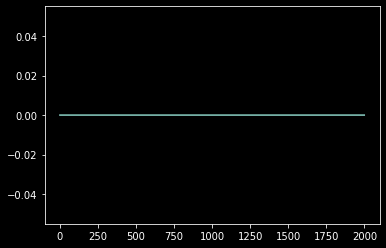

In [33]:
plt.plot(Test._tracks[0]._msd)

In [17]:
test = MFTrackDB.from_track_extractor(file="", minimum_length=100)

In [18]:
t =[]
for track in test._tracks:
    t.append((track._t.shape[0],track._id))

In [19]:
t.sort(reverse=True)

In [20]:
t

[(6945, 66),
 (6616, 39),
 (5859, 155),
 (5231, 65),
 (4355, 146),
 (4208, 277),
 (3538, 83),
 (3533, 275),
 (3513, 301),
 (3490, 208),
 (3448, 114),
 (3343, 281),
 (3163, 47),
 (3151, 210),
 (3136, 239),
 (3090, 247),
 (3025, 119),
 (3017, 285),
 (2940, 202),
 (2759, 45),
 (2688, 38),
 (2573, 48),
 (2512, 115),
 (2497, 176),
 (2458, 172),
 (2387, 260),
 (2320, 130),
 (2235, 167),
 (2220, 270),
 (2178, 4),
 (2141, 298),
 (2100, 104),
 (2036, 259),
 (2027, 182),
 (1996, 148),
 (1972, 25),
 (1905, 249),
 (1877, 282),
 (1842, 71),
 (1805, 263),
 (1765, 234),
 (1762, 296),
 (1748, 84),
 (1724, 175),
 (1718, 207),
 (1693, 82),
 (1673, 111),
 (1653, 227),
 (1650, 189),
 (1647, 32),
 (1622, 180),
 (1615, 287),
 (1604, 105),
 (1588, 267),
 (1576, 244),
 (1567, 288),
 (1547, 147),
 (1546, 228),
 (1546, 81),
 (1545, 199),
 (1531, 303),
 (1526, 219),
 (1521, 218),
 (1509, 169),
 (1506, 183),
 (1496, 15),
 (1483, 191),
 (1471, 276),
 (1458, 30),
 (1397, 197),
 (1388, 217),
 (1379, 91),
 (1369, 195

In [24]:
col = {'T':[], 'Position X':[], 'Position Y':[], 'TrackID':[]}
TRACK = MFTrackDB.from_track_extractor(file=askFILE(), minimum_length=100)

for i,ID in enumerate([66,39,155]):
    tmp = TRACK._tracks[ID]
    col['Position X'].append(tmp._x[:2000])
    col['Position Y'].append(tmp._y[:2000])
    col['T'].append(tmp._t[:2000])
    col['TrackID'].append(np.full(shape = 2000, fill_value=i))

col['T'] = np.concatenate(col['T'])
col['Position X'] = np.concatenate(col['Position X'])
col['Position Y'] = np.concatenate(col['Position Y'])
col['TrackID'] = np.concatenate(col['TrackID'])

DF = pd.DataFrame(col)
DF.to_csv(askDIR()+"/"+input()+".csv", index=False)

In [16]:
col = {'T':[], 'Position X':[], 'Position Y':[], 'TrackID':[]}

for i,file in enumerate(askFILES()):
    tmp = MFTrackDB.from_track_extractor(file=file, minimum_length=100)._tracks[0]
    col['Position X'].append(tmp._x[:4000])
    col['Position Y'].append(tmp._y[:4000])
    col['T'].append(tmp._t[:4000])
    col['TrackID'].append(np.full(shape = 4000, fill_value=i))

col['T'] = np.concatenate(col['T'])
col['Position X'] = np.concatenate(col['Position X'])
col['Position Y'] = np.concatenate(col['Position Y'])
col['TrackID'] = np.concatenate(col['TrackID'])

DF = pd.DataFrame(col)
DF.to_csv(askDIR()+"/"+input()+".csv", index=False)

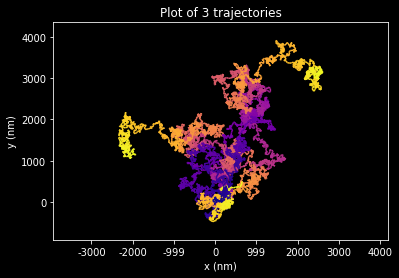

In [28]:
TEST = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
TEST.plot_trajectories()

In [23]:
col = {'T':[], 'Position X':[], 'Position Y':[], 'TrackID':[]}

for i,ID in enumerate([66,50,57]):
    tmp = TEST._tracks[ID]
    col['Position X'].append(tmp._x[:1400])
    col['Position Y'].append(tmp._y[:1400])
    col['T'].append(tmp._t[:1400])
    col['TrackID'].append(np.full(shape = 1400, fill_value=i))

col['T'] = np.concatenate(col['T'])
col['Position X'] = np.concatenate(col['Position X'])
col['Position Y'] = np.concatenate(col['Position Y'])
col['TrackID'] = np.concatenate(col['TrackID'])

DF = pd.DataFrame(col)
DF.to_csv(askDIR()+"/"+input()+".csv", index=False)

### Let's do some MSDs

In [1]:
import sys
sys.path.insert(0,'..')

import trait2d.analysis as tr
import trait2d.analysis.minflux as mf
from trait2d.analysis.minflux import MFTrack, MFTrackDB, track_extractor
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from os import listdir,makedirs
import os
import json
import shutil
import pandas as pd
from trait2d.analysis import BIC #function that calculates the BIC, obviously
from scipy.optimize import curve_fit
from scipy.stats import kstest
plt.style.use('dark_background')

from pyDialogue import *

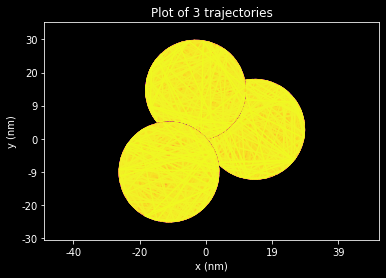

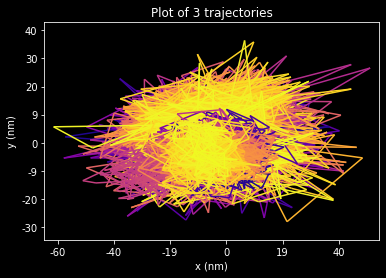

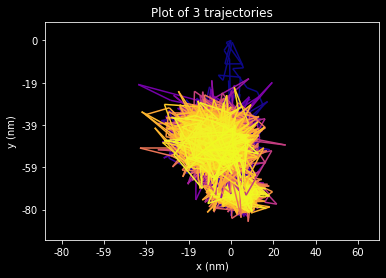

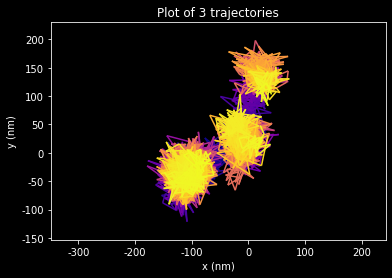

In [9]:
## Load the data

SIM_DATA = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
SIM_DATA.plot_trajectories()

iSCAT_DATA = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
iSCAT_DATA.plot_trajectories()

MF_DATA = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
MF_DATA.plot_trajectories()

# LARGE MINFLUX BEADS
MF_DATA_LARGE = MFTrackDB.from_file(file = "", format="csv", col_name_x="Position X", col_name_y="Position Y", col_name_t="T", col_name_id="TrackID", unit_length="metres", unit_time="seconds")
MF_DATA_LARGE.plot_trajectories()

In [10]:
SIM_DATA.MF_calculate_MSD()
iSCAT_DATA.MF_calculate_MSD()
MF_DATA.MF_calculate_MSD()
MF_DATA_LARGE.MF_calculate_MSD()

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/3999 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/3999 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/3999 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/4000 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/4001 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/8126 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/17618 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/1034 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/2299 [00:00<?, ?it/s]

Spinning up MSD calculation ...:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating intervals ...:   0%|          | 0/2579 [00:00<?, ?it/s]

Binning MSD ...:   0%|          | 0/6570 [00:00<?, ?it/s]

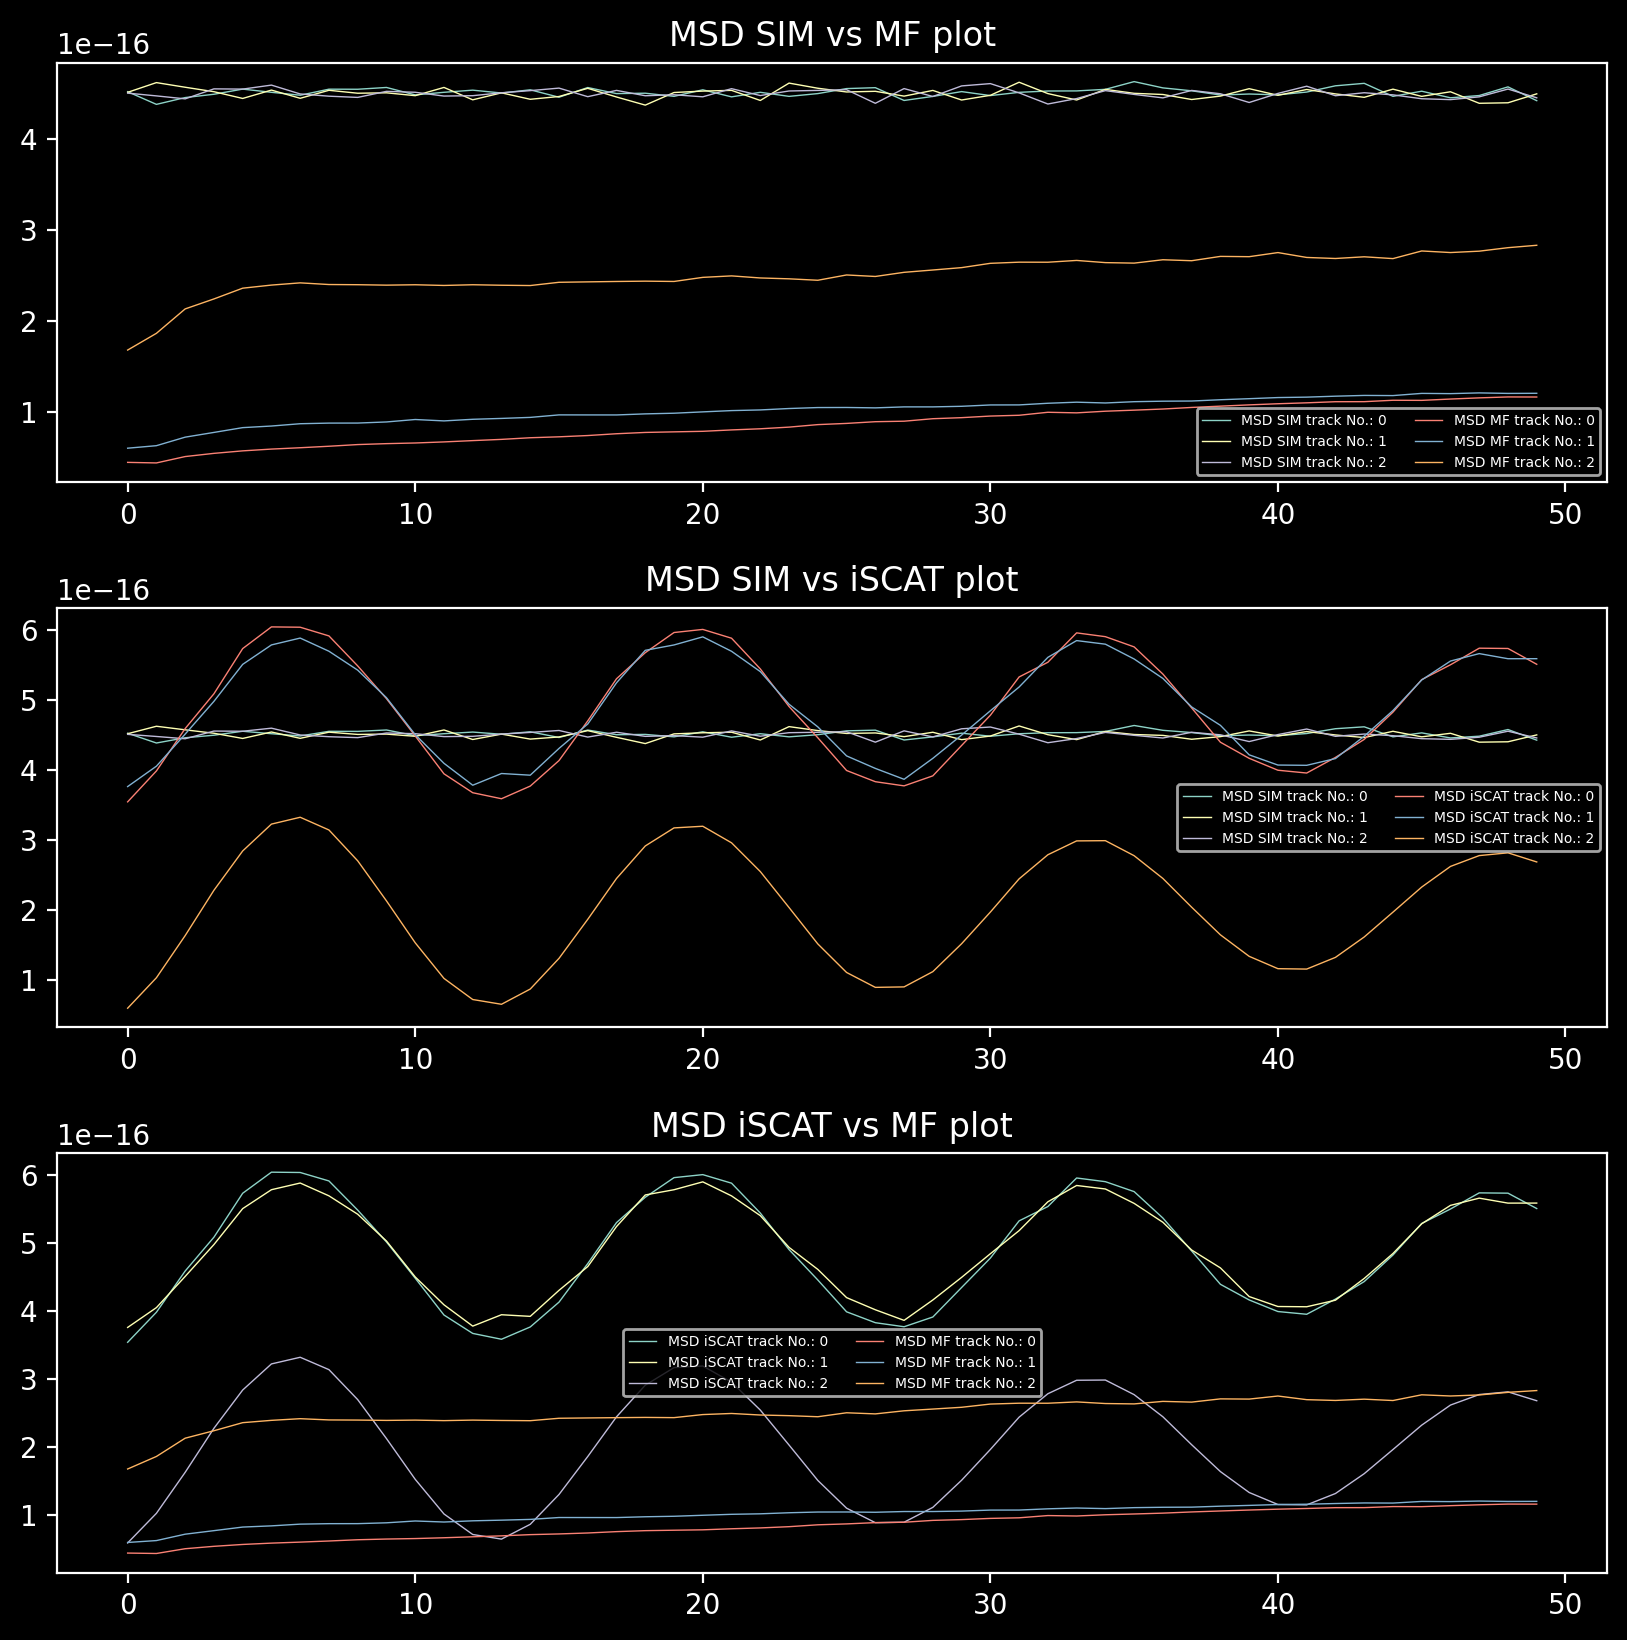

In [5]:
## Let's plot some

def plot_some(MFTrack:MFTrackDB, ax:plt.axes, name:str, restraint:int):
    for track in MFTrack._tracks:
        ax.plot(np.arange(restraint), track._msd[:restraint], label = "MSD {} track No.: {}".format(name,track._id), linewidth = 0.5) #track._msd[:restraint]/np.max(track._msd[:restraint])

constraint = 50

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (10,10), dpi = 200)
plt.subplots_adjust(hspace = 0.3)

ax1.set_title("MSD SIM vs MF plot")
plot_some(SIM_DATA, ax1, "SIM", constraint)
plot_some(MF_DATA, ax1, "MF", constraint)
ax1.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)


ax2.set_title("MSD SIM vs iSCAT plot")
plot_some(SIM_DATA, ax2, "SIM", constraint)
plot_some(iSCAT_DATA, ax2, "iSCAT", constraint)
ax2.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)


ax3.set_title("MSD iSCAT vs MF plot")
plot_some(iSCAT_DATA, ax3, "iSCAT", constraint)
plot_some(MF_DATA, ax3, "MF", constraint)
ax3.legend(loc = 'best', fancybox = True, fontsize = 5, ncol = 2)

plt.savefig(askDIR()+"/"+input('Enter filename...'))

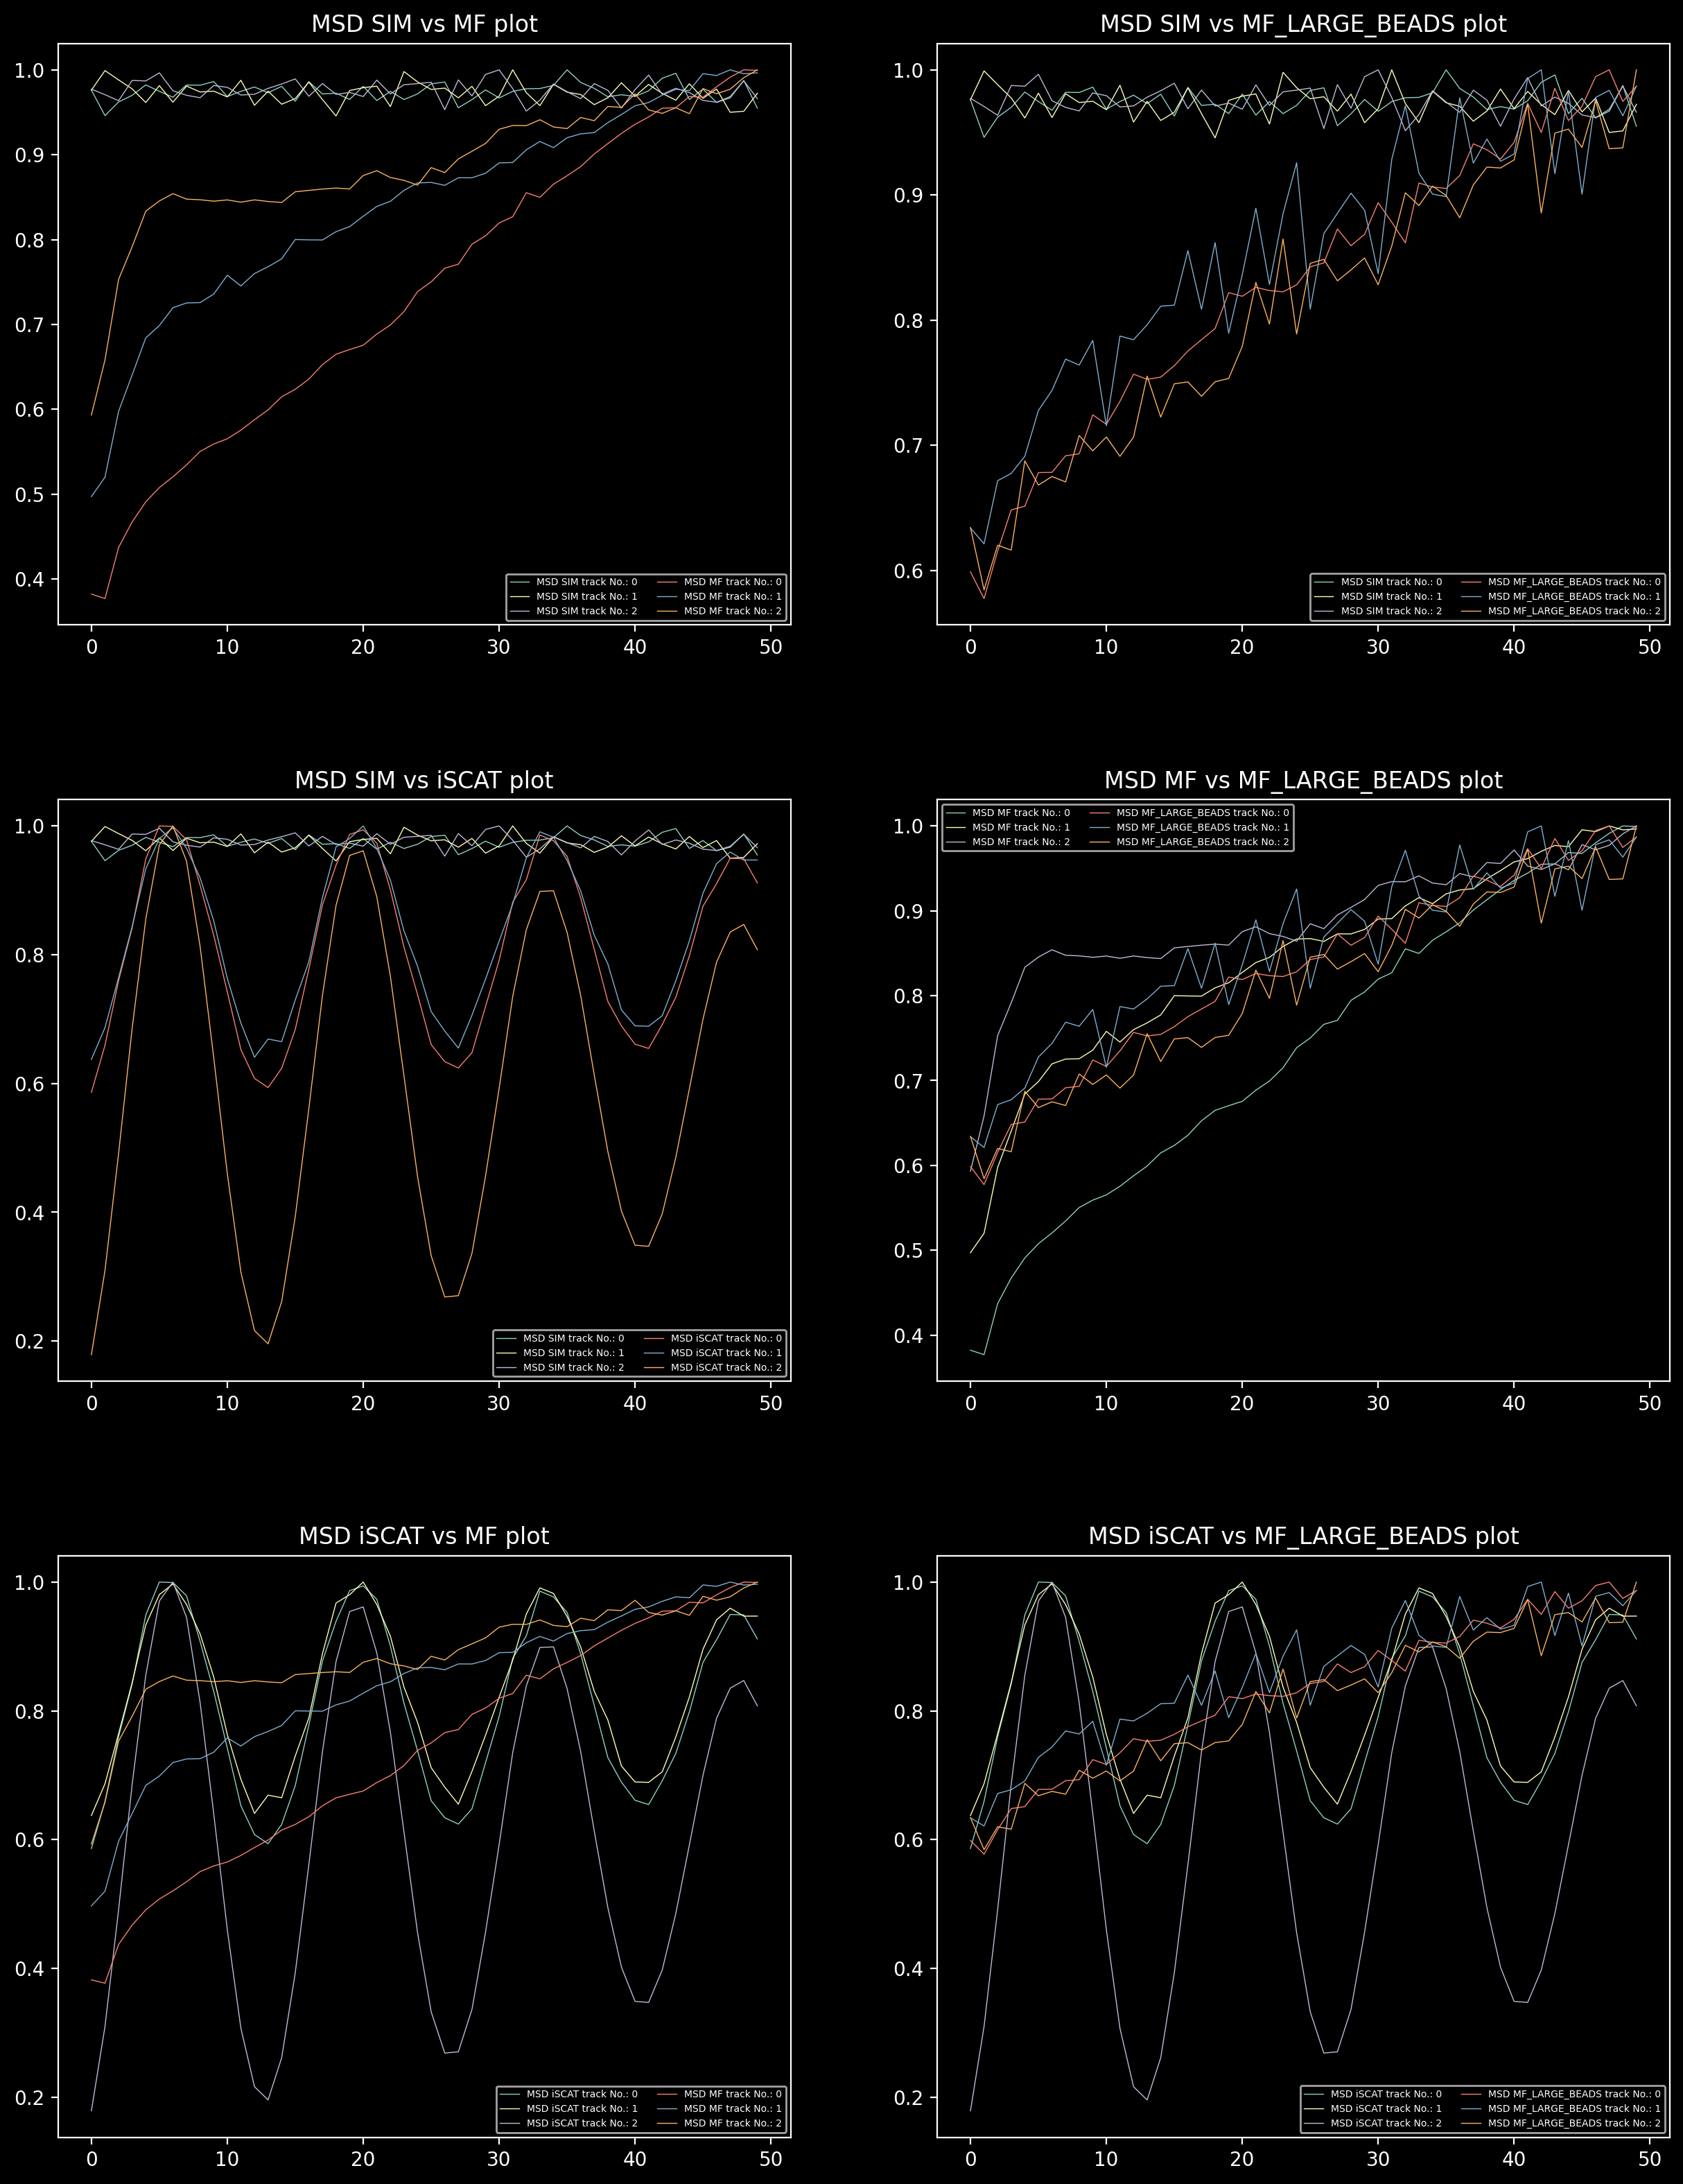

In [17]:
## Let's plot some

def plot_some(MFTrack:MFTrackDB, ax:plt.axes, name:str, restraint:int):
    for track in MFTrack._tracks:
        ax.plot(np.arange(restraint), track._msd[:restraint]/np.max(track._msd[:restraint]), label = "MSD {} track No.: {}".format(name,track._id), linewidth = 0.5) #track._msd[:restraint]/np.max(track._msd[:restraint])

constraint = 50

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (15,20), dpi = 200)
plt.subplots_adjust(hspace = 0.3)

ax1.set_title("MSD SIM vs MF plot")
plot_some(SIM_DATA, ax1, "SIM", constraint)
plot_some(MF_DATA, ax1, "MF", constraint)
ax1.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)

ax2.set_title("MSD SIM vs MF_LARGE_BEADS plot")
plot_some(SIM_DATA, ax2, "SIM", constraint)
plot_some(MF_DATA_LARGE, ax2, "MF_LARGE_BEADS", constraint)
ax2.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)


ax3.set_title("MSD SIM vs iSCAT plot")
plot_some(SIM_DATA, ax3, "SIM", constraint)
plot_some(iSCAT_DATA, ax3, "iSCAT", constraint)
ax3.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)

ax4.set_title("MSD MF vs MF_LARGE_BEADS plot")
plot_some(MF_DATA, ax4, "MF", constraint)
plot_some(MF_DATA_LARGE, ax4, "MF_LARGE_BEADS", constraint)
ax4.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)

ax5.set_title("MSD iSCAT vs MF plot")
plot_some(iSCAT_DATA, ax5, "iSCAT", constraint)
plot_some(MF_DATA, ax5, "MF", constraint)
ax5.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)

ax6.set_title("MSD iSCAT vs MF_LARGE_BEADS plot")
plot_some(iSCAT_DATA, ax6, "iSCAT", constraint)
plot_some(MF_DATA_LARGE, ax6, "MF_LARGE_BEADS", constraint)
ax6.legend(loc = 'best', fancybox = True, fontsize = 5,  ncol = 2)

plt.savefig(askDIR()+"/"+input('Enter filename...'))